In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# from scipy.signal import butter, sosfilt, sosfreqz

In [2]:
# cols = ['time', 'ax', 'ay', 'az', 'wx', 'wy', 'wz', 'ax_filtered', 'ay_filtered',
#         'az_filtered', 'wx_filtered', 'wy_filtered', 'wz_filtered', 'label']
# walk_foot = pd.read_csv('data_processed/walk_foot.csv', names=cols)
walk = pd.read_csv('data/walk_foot-2019-11-2715.42.22.csv').dropna(axis='columns')
# walk_foot = pd.read_csv('cmpt353-group-cj/data/walk_foot-2019-11-2715.42.22.csv')

In [3]:
walk

,time,ax,ay,az,wx,wy,wz
0,0.003,-0.44,-0.28,0.14,-0.00,0.00,-0.02
1,0.004,-0.49,-0.16,0.09,-0.00,0.00,-0.02
2,0.004,-0.49,-0.16,0.09,-0.01,-0.01,-0.02
3,0.004,-0.49,-0.16,0.09,-0.01,-0.01,-0.01
4,0.004,-0.43,0.03,0.00,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...
22486,37.172,0.18,0.41,0.10,0.23,-0.18,-0.15
22487,37.175,0.18,0.41,0.10,0.22,-0.15,-0.14
22488,37.177,0.14,0.52,-0.14,0.22,-0.15,-0.14
22489,37.178,0.14,0.52,-0.14,0.21,-0.13,-0.13


In [12]:
def vectorAcceleration(df):
    '''
        calculate vector acceleration
    '''
    return np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2)

# df = pd.DataFrame(columns=['time', 'acceleration', 'gyro', 'g_removed'])
# df['time'] = walk['time']
walk['magnitude_acc'] = walk.apply(vectorAcceleration, axis=1)

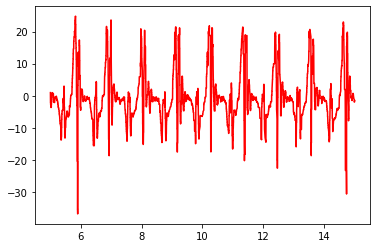

In [4]:
# walk
df1 = walk.loc[(walk['time'] > 5) & (walk['time'] < 15)]
x1 = df1['time']
plt.plot(x1, df1.ax, 'r')
# plt.plot(x, df.ay)
# plt.plot(x, df.az)
# plt.plot(x, df.magnitude_acc, 'b')
plt.show()

In [8]:
# fs = 210.0
# lowcut = 50
# highcut = 150
# b, a = signal.butter(3, 0.05, btype='lowpass', analog=False)
# walk['magnitude_acc'] = signal.filtfilt(b, a, walk['magnitude_acc'])

In [9]:
# df = walk.loc[(walk['time'] > 5) & (walk['time'] < 40)]
# x = df['time']
# # plt.plot(x, df.ax, 'r')
# # plt.plot(x, df.ay)
# # plt.plot(x, df.az)
# plt.plot(x, df.magnitude_acc, 'b')
# plt.show()

In [14]:
# from scipy.signal import butter, sosfilt, sosfreqz
def butter_bandpass(lowcut, highcut, fs, order=3):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [0.25, 0.75], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

fs = 200.0
lowcut = 50.0
highcut = 150.0
walk['magnitude_acc_filtered'] = butter_bandpass_filter(walk['magnitude_acc'], lowcut, highcut, fs, order=3)

In [15]:
walk['ax_filtered'] = butter_bandpass_filter(walk['ax'], lowcut, highcut, fs, order=3)
walk['ay_filtered'] = butter_bandpass_filter(walk['ay'], lowcut, highcut, fs, order=3)
walk

,time,ax,ay,az,wx,wy,wz,magnitude_acc,magnitude_acc_filtered,ax_filtered,ay_filtered
0,0.003,-0.44,-0.28,0.14,-0.00,0.00,-0.02,0.540000,0.090000,-0.073333,-0.046667
1,0.004,-0.49,-0.16,0.09,-0.00,0.00,-0.02,0.523259,0.087210,-0.081667,-0.026667
2,0.004,-0.49,-0.16,0.09,-0.01,-0.01,-0.02,0.523259,-0.182790,0.138333,0.113333
3,0.004,-0.49,-0.16,0.09,-0.01,-0.01,-0.01,0.523259,-0.174420,0.163333,0.053333
4,0.004,-0.43,0.03,0.00,-0.01,-0.01,-0.01,0.431045,0.050211,-0.022222,-0.039444
...,...,...,...,...,...,...,...,...,...,...,...
22486,37.172,0.18,0.41,0.10,0.23,-0.18,-0.15,0.458803,0.069654,-0.000381,-0.020592
22487,37.175,0.18,0.41,0.10,0.22,-0.15,-0.14,0.458803,-0.135485,-0.004817,0.041598
22488,37.177,0.14,0.52,-0.14,0.22,-0.15,-0.14,0.556417,0.068475,0.004201,-0.007702
22489,37.178,0.14,0.52,-0.14,0.21,-0.13,-0.13,0.556417,0.037227,0.012773,-0.005544


In [6]:
b, a = signal.butter(3, 0.05, btype='lowpass', analog=False)
walk['ax_filtered'] = signal.filtfilt(b, a, walk['ax'])
walk['ay_filtered'] = signal.filtfilt(b, a, walk['ay'])
walk['az_filtered'] = signal.filtfilt(b, a, walk['az'])
def vectorAcceleration(df):
    '''
        calculate vector acceleration
    '''
    return np.sqrt(df['ax_filtered']**2 + df['ay_filtered']**2 + df['az_filtered']**2)

# df = pd.DataFrame(columns=['time', 'acceleration', 'gyro', 'g_removed'])
# df['time'] = walk['time']
walk['magnitude_acc'] = walk.apply(vectorAcceleration, axis=1)

In [7]:
df2 = walk.loc[(walk['time'] > 5) & (walk['time'] < 15)]
x2 = df2['time']
# plt.plot(x2, df2.ax, 'r')
# plt.plot(x, df.ay)
# plt.plot(x, df.az)
# plt.plot(x2, df2.magnitude_acc, 'b')
# plt.plot(x2, df2.magnitude_acc_filtered, 'r')
# plt.show()

In [8]:
from scipy import integrate
def vel_integration(acc_lst, time_lst):
    acc = np.array(acc_lst, dtype=np.float64)
    vel = integrate.cumtrapz(acc, time_lst, initial=0)
#     dist = integrate.cumtrapz(vel, time, initial=0)
    return vel

vel_x = vel_integration(df2.ax_filtered, x2)
vel_y = vel_integration(df2.ay_filtered, x2)

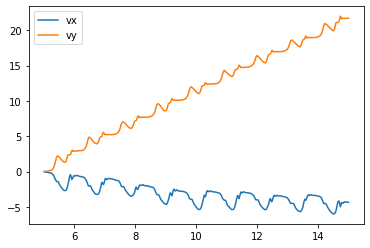

In [11]:
plt.plot(x2, vel_x, label='vx')
plt.plot(x2, vel_y, label='vy')
plt.legend()
plt.show()

In [12]:
vel = np.square(vel_x)+ np.square(vel_y)
type(vel_x)

numpy.ndarray

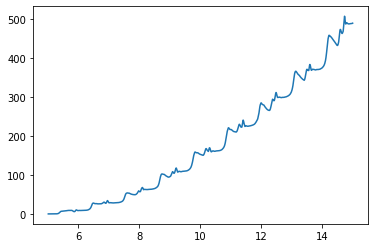

In [13]:
plt.plot(x2, vel)
plt.show()

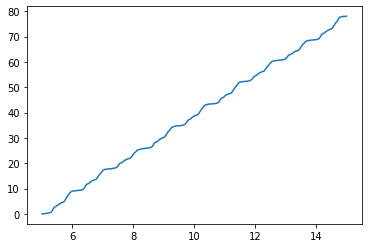

In [17]:
vel_acc_filtered = vel_integration(df2.magnitude_acc, x2) 
plt.plot(x2, vel_acc_filtered)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, integrate

walk_foot = pd.read_csv('data/walk_foot-2019-11-2715.42.22.csv').dropna(axis='columns')
run_foot = pd.read_csv('data/run_foot-2019-11-2715.55.43.csv').dropna(axis='columns')
upstairs_foot = pd.read_csv('data/upstairs_foot-2019-11-2715.23.25.csv').dropna(axis='columns')
downstaiars_foot = pd.read_csv('data/downstairs_foot-2019-11-2715.23.59.csv').dropna(axis='columns')

activity_type = [walk_foot, run_foot, upstairs_foot, downstaiars_foot]
vel = []
def vectorAcceleration(df):
    '''
        calculate vector acceleration
    '''
    return np.sqrt(df['ax_filtered']**2 + df['ay_filtered']**2 + df['az_filtered']**2)

def noiseSmooth(df):
    '''
        use Butterworth filter
    '''
    b, a = signal.butter(3, 0.05, btype='lowpass', analog=False)
    df['ax_filtered'] = signal.filtfilt(b, a, df['ax'])
    df['ay_filtered'] = signal.filtfilt(b, a, df['ay'])
    df['az_filtered'] = signal.filtfilt(b, a,  df['az'])
    return df

def vel_integration(acc_lst, time_lst):
    acc = np.array(acc_lst, dtype=np.float64)
    vel = integrate.cumtrapz(acc, time_lst, initial=0)
#     dist = integrate.cumtrapz(vel, time, initial=0)
    return vel

def extractData(df, min=5, max=15):
    '''
    extrac start and beginning dummy data
    '''
    condition = (df['time'] > min) & (df['time'] < max)
    return df.iloc[5000:10000].reset_index(drop=True)

for i, m in enumerate(activity_type):  # yes, you can leave this loop in if you want.
    m =extractData(m)
    m = noiseSmooth(m)
    m['magnitude_acc'] = m.apply(vectorAcceleration, axis=1)
    vel_acc_filtered = vel_integration(m.magnitude_acc, m.time)
    vel.append(vel_acc_filtered)

In [5]:
walk_foot

,time,ax,ay,az,wx,wy,wz
0,0.003,-0.44,-0.28,0.14,-0.00,0.00,-0.02
1,0.004,-0.49,-0.16,0.09,-0.00,0.00,-0.02
2,0.004,-0.49,-0.16,0.09,-0.01,-0.01,-0.02
3,0.004,-0.49,-0.16,0.09,-0.01,-0.01,-0.01
4,0.004,-0.43,0.03,0.00,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...
22486,37.172,0.18,0.41,0.10,0.23,-0.18,-0.15
22487,37.175,0.18,0.41,0.10,0.22,-0.15,-0.14
22488,37.177,0.14,0.52,-0.14,0.22,-0.15,-0.14
22489,37.178,0.14,0.52,-0.14,0.21,-0.13,-0.13


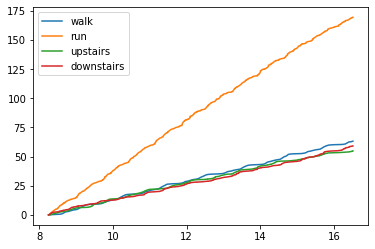

In [3]:
df2 = walk_foot.iloc[5000:10000]
x2 = df2['time']
plt.plot(x2, vel[0], label='walk')
plt.plot(x2, vel[1], label='run')
plt.plot(x2, vel[2], label='upstairs')
plt.plot(x2, vel[3], label='downstairs')
plt.legend()
plt.show()